In [ ]:
from cProfile import label
from calendar import c
import csv
from sre_constants import RANGE
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import zoom
from scipy.signal import savgol_filter
import os

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def sum_lists(lists):
    if (len(lists)==1):
        return lists[0]
    mylist = sum(map(np.array, lists))
    return mylist

def make_odd(x):
    if (x%2==0):
        return x-3
    else:
        return x-1

def mean_list(lists):
    arrays = [np.array(x) for x in lists]
    new_list=[np.mean(k) for k in zip(*arrays)]
    #return new_list
    std_list=[(np.std(k)/np.sqrt(5)) for k in zip(*arrays)]
    return new_list,std_list 

def simetric(list):
    new_list=[]
    for i in range(len(list)):
        new_list.append(-list[i])
    return new_list

def create_list(file_dir, variable):
    with open(file_dir) as csvfile:
        reader = csv.reader(csvfile, delimiter = ",")
        count=0
        iterator=0
        col=-1
        values=[]
        verified_label="none"
        for row in reader:
            if count==0:
                for label in row:
                    if label==variable:
                        col=iterator
                        verified_label=label
                        break
                    else:
                        iterator+=1

            if count>0 and col!=-1:
                values.append(float(row[col]))
            count+=1
        return values




plt.style.use('ggplot')

data_folder = r'C:/Users/Bas/Documents/DataFolder/Joao_Ortiz/Dados_Sidestep_x'

cl2= os.path.join(data_folder,'ACL2/CUTLEFT1/IAA/results/' , 'cl2_InducedAccelerations_center_of_mass.csv')
cr2=os.path.join(data_folder,'ACL2/CUTRIGHT1/IAA/results/' , 'cr2_InducedAccelerations_center_of_mass.csv')
icl2=os.path.join(data_folder,'ACL2/INDECISIONCUT7/IAA/results/' , 'icr2_InducedAccelerations_center_of_mass.csv')
icr2=os.path.join(data_folder,'ACL2/INDECISIONCUT3/IAA/results/' , 'icl2_InducedAccelerations_center_of_mass.csv')

cl4=os.path.join(data_folder,'ACL4/CUTLEFT2/IAA/results/' , 'cl4_InducedAccelerations_center_of_mass.csv')
cr4=os.path.join(data_folder,'ACL4/CUTRIGHT2/IAA/results/' , 'cr4_InducedAccelerations_center_of_mass.csv')
icl4=os.path.join(data_folder,'ACL4/INDECISIONCUT1/IAA/results/' , 'icl4_InducedAccelerations_center_of_mass.csv')
icr4=os.path.join(data_folder,'ACL4/INDECISIONCUT3/IAA/results/' , 'icr4_InducedAccelerations_center_of_mass.csv')

cl5=os.path.join(data_folder,'ACL5/CUTLEFT3/IAA/results/' , 'cl5_InducedAccelerations_center_of_mass.csv')
cr5=os.path.join(data_folder,'ACL5/CUTRIGHT3/IAA/results/' , 'cr5_InducedAccelerations_center_of_mass.csv')
icl5=os.path.join(data_folder,'ACL5/INDECISIONCUT5/IAA/results/' , 'icl5_InducedAccelerations_center_of_mass.csv')
icr5=os.path.join(data_folder,'ACL5/INDECISIONCUT1/IAA/results/' , 'icr5_InducedAccelerations_center_of_mass.csv')

cl8=os.path.join(data_folder,'ACL8/CUTLEFT2/IAA/results/' , 'cl8_InducedAccelerations_center_of_mass.csv')
cr8=os.path.join(data_folder,'ACL8/CUTRIGHT3/IAA/results/' , 'cr8_InducedAccelerations_center_of_mass.csv')
icl8=os.path.join(data_folder,'ACL8/INDECISIONCUT4/IAA/results/' , 'icl8_InducedAccelerations_center_of_mass.csv')
icr8=os.path.join(data_folder,'ACL8/INDECISIONCUT5/IAA/results/' , 'icr8_InducedAccelerations_center_of_mass.csv')

cl9=os.path.join(data_folder,'ACL9/CUTLEFT2/IAA/results/' , 'cl9_InducedAccelerations_center_of_mass.csv')
cr9=os.path.join(data_folder,'ACL9/CUTRIGHT2/IAA/results/' , 'cr9_InducedAccelerations_center_of_mass.csv')
icl9=os.path.join(data_folder,'ACL9/INDECISIONCUT3/IAA/results/' , 'icl9_InducedAccelerations_center_of_mass.csv')
icr9=os.path.join(data_folder,'ACL9/INDECISIONCUT4/IAA/results/' , 'icr9_InducedAccelerations_center_of_mass.csv')


files=[cl2,cr2,icl2,icr2,cr4,cl4,icr4,icl4,cr5,cl5,icr5,icl5,cr8,cl8,icr8,icl8,cl9,cr9,icl9,icr9]
legs=["l","r","l","r","r","l","r","l","r","l","r","l","r","l","r","l","l","r","l","r"]


#+subjects[subj]
names=["Reconstructed ACL anticipated cut ","Healthy ACL anticipated cut ","Reconstructed ACL unanticipated cut ","Healthy ACL unanticipated cut "]

label_size=10
title_size=10
line_size=1
legend_size=12

# # test_list=create_list(Icl2,"hip_flexion_l_moment")
# # print(test_list)

# #task_name=["null","CutLeft", "CutRight", "IndecisionCutLeft", "IndecisionCutRight"]
#subjects=["ACL2","ACL4","ACL5","ACL8","ACL9"]

total=["total_"]
vasti=["vas_med_*_",	"vas_int_*_"	,"vas_lat_*_"]
hamstrings=["semimem_*_",	"semiten_*_",		"bifemlh_*_",		"bifemsh_*_"]
gas=["med_gas_*_",	"lat_gas_*_"]
rect_fem=["rect_fem_*_"]
sol=["soleus_*_"]
il_ps=["iliacus_*_","psoas_*_"]
glut_med=["glut_med1_*_","glut_med2_*_"	,	"glut_med3_*_"]
glut_max=["glut_max1_*_",	"glut_max2_*_",	"glut_max3_*_"]
glut_min=["glut_min1_*_",	"glut_min2_*_",	"glut_min3_*_"]
gravity=["gravity_"]
# dof_d=["pelvis_tilt", "pelvis_list", "pelvis_rotation","lumbar_extension","lumbar_bending","lumbar_rotation"]
# dof_m=["pelvis_tilt_moment", "pelvis_list_moment", "pelvis_rotation_moment","lumbar_extension_moment","lumbar_bending_moment","lumbar_rotation_moment"]

m_groups=[total,vasti,hamstrings,gas,glut_max,glut_med,rect_fem,il_ps,sol,gravity]
m_groups_names=["total","vasti","hamstrings","gastrocnemius","gluteus maximus","gluteus medius","rectus femoris","iliopsoas","soleus","gravity"]
#graph_names=["Reconstructed ACL anticipated cut (Vertical)","Healthy ACL anticipated cut (Vertical)","Reconstructed ACL unanticipated cut (Vertical)","Healthy ACL unanticipated cut (Vertical)","Reconstructed ACL anticipated cut (Ant/Post)","Healthy ACL anticipated cut (Ant/Post)","Reconstructed ACL unanticipated cut (Ant/Post)","Healthy ACL unanticipated cut (Ant/Post)"]
ra=[cl2,cr4,cr5,cr8,cl9]
ha=[cr2,cl4,cl5,cl8,cr9]
ru=[icl2,icr4,icr5,icr8,icl9]
hu=[icr2,icl4,icl5,icl8,icr9]
anticipated=[ra,ha]
unanticipated=[ru,hu]
title_names=["anticipated","unanticipated"]
line_names=["Reconstructed ACL","Healthy ACL"]
direction_code=["Z","Y","X"]
direction_names=["Mediolateral","vertical","Ant/Post"]
shade_colors=[['lightpink'],['lightblue']]
error_names=["Standard error Reconstructed ACL","Standard error Healthy ACL"]
poly_factor=15
mean_contrib=[]
std_errors=[]

for direction in direction_names:
    for decision in title_names:
        for i_group in range(len(m_groups)):
            # muscular groups/subplots
            plt.subplot(2,5,i_group+1)
            plt.title(m_groups_names[i_group],fontsize=title_size)
            
            if (i_group==0 or i_group==5):
                plt.ylabel(direction + " acceleration (m/s/u00b2)")
                
            for d in range(2):
                # reconstructed/healthy
                task_type=decision[d]
                for task in task_type:
                    print(task)



In [ ]:


for i_direction in range(3):
    for i in range(2):
    #anticipated/unanticipated
        plt.suptitle('Muscle groups '+direction_names[i_direction]+' contribution to the centre of mass on '+title_names[i]+' tasks')
        if (i==0):
            decision=anticipated
        if(i==1):
            decision=unanticipated
        for i_group in range(len(m_groups)):
            # muscular groups/subplots
            plt.subplot(2,5,i_group+1)
            plt.title(m_groups_names[i_group],fontsize=title_size)
            
            if (i_group==0 or i_group==5):
                plt.ylabel(direction_names[i_direction]+" acceleration (m/s/u00b2)")
                
            for d in range(2):
                # reconstructed/healthy
                task_type=decision[d]
                #print(task_type)
                task_type_lists=[]
                for task in task_type:
                    #subjects
                    if ("cr" in task):
                        leg="r"
                    if ("cl" in task):
                        leg="l"
                    g_lists=[]
                    for actuator in m_groups[i_group]:
                    #muscle in muscle group
                        actuator=actuator.replace("*",leg)+direction_code[i_direction]
                        #print(actuator)
                        #print(task)
                        ac_list=create_list(task,actuator)
                        if (i_direction==0 and ("ACL2" in task or "ACL9" in task)):
                            ac_list=simetric(ac_list)
                        ac_list=smooth(ac_list,40)
                        #ac_list=savgol_filter(ac_list,len(ac_list),poly_factor)
                        #ac_list=savgol_filter(ac_list,make_odd(len(ac_list)),poly_factor)
                        #print(ac_list)
                        g_lists.append(ac_list)
                    g_list=sum_lists(g_lists)
                    factor=250/len(g_list)
                    g_list=zoom(g_list,factor)
                    g_list=smooth(g_list,40)
                    task_type_lists.append(g_list)

                task_list,std=mean_list(task_type_lists)
                if (i_direction==0 and d==0):
                    task_list= simetric(task_list)
                average_force=np.mean(task_list)
                standard_error=np.std(task_list)/np.sqrt(5)
                mean_contrib.append(average_force)
                std_errors.append(standard_error)
                task_list=zoom(task_list,1)
                std=zoom(std,1)
                plt.plot(task_list,linewidth=line_size,label=line_names[d])
                plt.fill_between(range(250),task_list-std, task_list+std,color=shade_colors[d],label=error_names[d],alpha=0.5)
            plt.xticks([])
            plt.xlabel("Task %",fontsize=title_size)
            if (i_group==7):
                plt.legend(fontsize=legend_size,loc='upper center', bbox_to_anchor=(0.5, -0.085),fancybox=True, shadow=False, ncol=4)
            plt.grid(True)
            plt.yticks(fontsize=10)
            plt.subplots_adjust(left=0.055,
                bottom=0.12,
                right=0.98,
                top=0.9,
                wspace=0.22,
                hspace=0.22)
        plt.show()

    barWidth = 0.22
    fig = plt.subplots()
    plt.title("Average Contributions on the "+direction_names[i_direction] +" axis",fontsize=15)
    # if (i_direction==0):
    #     plt.title("Average Contributions on the vertical axis",fontsize=15)
    # if (i_direction==1):
    #     plt.title("Average Contributions on the anterior/posterior axis",fontsize=15)

    ra_c=mean_contrib[0:20:2]
    ha_c=mean_contrib[1:20:2]
    ru_c=mean_contrib[20:40:2]
    hu_c=mean_contrib[21:40:2]

    stde_ra=std_errors[0:20:2]
    stde_ha=std_errors[1:20:2]
    stde_ru=std_errors[20:40:2]
    stde_hu=std_errors[21:40:2]


    br1 = np.arange(10)
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]
    
    # Make the plot
    plt.bar(br1, ra_c, color ='lightpink', width = barWidth,yerr = stde_ra,ecolor='grey',
        capsize=3, edgecolor ='grey', label =names[0])
    plt.bar(br2, ha_c, color ='lightblue', width = barWidth,yerr = stde_ha,ecolor='grey',
        capsize=3, edgecolor ='grey', label =names[1])
    plt.bar(br3, ru_c, color ='plum', width = barWidth,yerr = stde_ru,ecolor='grey',
        capsize=3, edgecolor ='grey', label =names[2])
    plt.bar(br4, hu_c, color ='silver', width = barWidth,yerr = stde_hu,ecolor='grey',capsize=3, edgecolor ='grey', label =names[3])
    
    # Adding Xticks
    plt.xlabel('Muscle groups', fontweight ='bold', fontsize = 15)
    plt.ylabel(direction_names[i_direction]+" acceleration (m/s/u00b2)", fontweight ='bold', fontsize = 15)

    plt.xticks([r + barWidth*1.5 for r in range(10)],m_groups_names,fontsize=13, rotation=10)
    plt.subplots_adjust(left=0.07,
                        bottom=0.15,    
                        right=0.94,
                        top=0.93,
                        wspace=0.17,
                        hspace=0.22) 
    plt.legend(fontsize = 12)
    plt.show()

    mean_contrib=[]
    std_errors=[]

            
print(len(mean_contrib))
print(len(std_errors))
print(mean_contrib)
        

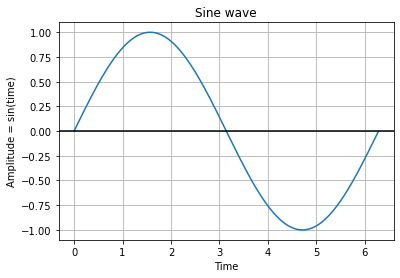

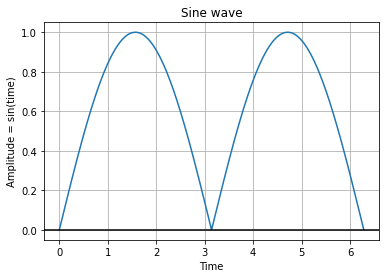

5.073044348824496e-06
3.9999749835721436


In [6]:
import numpy as np
import matplotlib.pyplot as plot

 
# Get x values of the sine wave
time = np.arange(0, 2*np.pi, 0.01)
# Amplitude of the sine wave is sine of a variable like time
amplitude = np.sin(time)
# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(time, amplitude)
# Give a title for the sine wave plot
plot.title('Sine wave')
# Give x axis label for the sine wave plot
plot.xlabel('Time')
# Give y axis label for the sine wave plot
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

# Plot a absolute ine wave using time and amplitude obtained for the sine wave
plot.plot(time, np.abs(amplitude))
# Give a title for the sine wave plot
plot.title('Sine wave')
# Give x axis label for the sine wave plot
plot.xlabel('Time')
# Give y axis label for the sine wave plot
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

print(np.trapz(amplitude,time))
print(np.trapz(np.abs(amplitude),time))